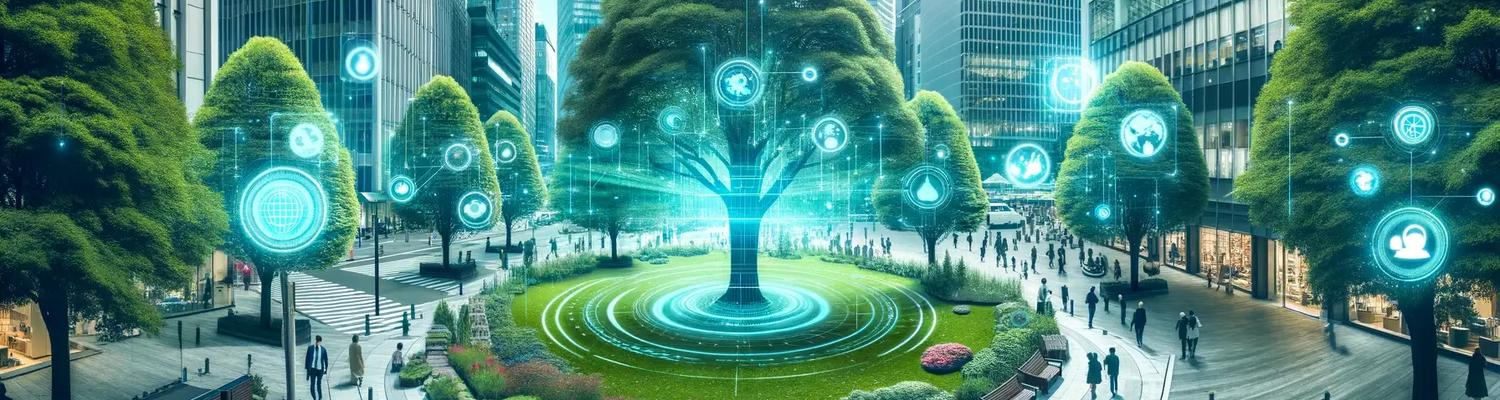

# SMBC Group GREEN×DATA Challengeチュートリアル
この度は**SMBC Group GREEN×DATA Challenge**にご参加いただきありがとうございます。\
このチュートリアルは分析コンペティションに初めて参加する方にもスムーズに取り組んでいただけるように作成しています。\
ぜひ参考にしてみてください。

# 1.課題を理解しよう
今回は木の健康状態の予測です。ニューヨークの市街地で管理されている木々に関する情報を分析します。

# 2.データをダウンロードしよう
課題を理解した後は、データタブからデータをダウンロードしてみましょう。 今回は3種類のデータが用意されており、下記ページのダウンロードアイコンをクリックするとデータをダウンロードできます。\
[https://signate.jp/competitions/1247/data](https://signate.jp/competitions/1247/data)


学習用データ　：モデルの学習に使用するデータ（木々の情報＋健康状態）\
評価用データ　：予測に使用するデータ（木々の情報のみ）\
応募用ファイル：予測結果の投稿に使用するサンプルフォーマット

# 3.環境を整えよう
データをダウンロードしたら分析環境を整備しましょう。なお、本チュートリアルでは次の環境を利用しています。
- Google Colaboratory
画像を参考にして、データの配置、Google Colaboratoryの起動を行ってみましょう。

1.   任意のGoogleDriveにフォルダを作成しデータを格納
2.   そのフォルダ内で「＋　新規」ボタンから画像のようにGoogle Colaboratoryを起動\
＊今回はMyDrive内にSMFGというフォルダを作成し、その中にデータを格納しています。

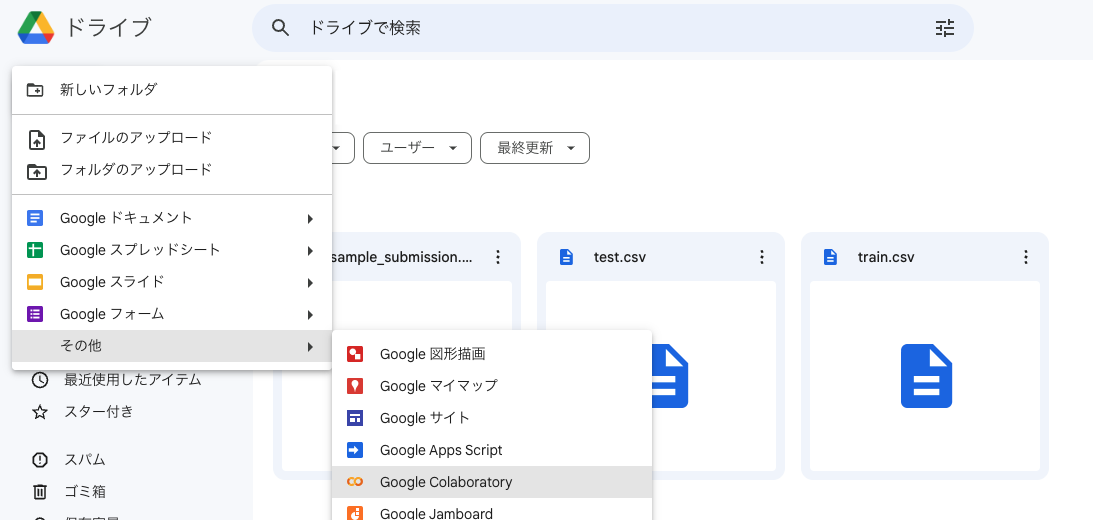

# 4.データ読み込もう
Google Colaboratoryが起動できたらデータを読み込みましょう。\
まずは下記のコードで、Google Colaboratoryと自分のGoogle Driveを接続します。\
別のタブでGoogleアカウントの選択、アクセスリクエストの許可を行います。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


今回はマイドライブの中にSMFGというフォルダを作成し、その中にデータを格納していますので、パスは下記のようになります。\
`/content/drive/MyDrive/SMFG`

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/SMFG/train.csv', index_col=0) # 学習用データ
test = pd.read_csv('/content/drive/MyDrive/SMFG/test.csv', index_col=0) # 学習用データ   # 評価用データ
sample_submit = pd.read_csv('/content/drive/MyDrive/SMFG/sample_submission.csv', index_col=0, header=None) # 応募用サンプルファイル

# 5.データの概要を確認しよう
読み込んだ学習用データの先頭5行を表示してみましょう。

In [ ]:
train.head()

,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,English oak,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,crimson king maple,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,English oak,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,NaN,honeylocust,...,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,London planetree,...,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9


1行で1本の木の情報を表していて、カラムは21種類あることが分かります。\
各カラムの意味は、データタブに記載されているのでそれと照らし合わせて確認できます。\
health（健康状態）が今回の予測の対象である目的変数で、0がFair（普通）、1がGood（良い）、2がPoor（悪い）です。

評価用データには、目的変数（health）はありません。その他のカラムは学習用データと同じです。\
つまり、答えのある学習用データの木の情報を元にして機械学習により木の健康状態の法則をモデル化し、そのモデルを評価用データに当てはめて、評価用データに記録されている各木が0、1、2のどれに当てはまるかを予測することが課題になります。

目的変数の値の学習用データでの出現数をカウントしてみましょう。

In [ ]:
train['health'].value_counts()

1    15751
0     3535
2      698
Name: health, dtype: int64

1（状態が良い）の木が一番多く、2（状態が悪い）の木が少ない不均衡データとなっています。

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null  int64 
 18  st_senate   19984 non-null  int64 
 19  st_assem    19984 non-null  int64 
 20  cncldi

また具体的な名称などのカテゴリ変数が多いデータとなっています。

# 6.前処理を行おう
機械学習によるモデルがより高い精度で学習ができるように、データをきれいにする前処理を行います。\
まずは欠損値の処理のみを行います。



In [ ]:
train.isnull().sum()

created_at        0
tree_dbh          0
curb_loc          0
health            0
steward       14883
guards        14943
sidewalk          0
user_type         0
problems      12243
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

steward、guards、problemsという列に欠損を含むことがわかりました。\
stewardは木の管理者数、guardsは木を保護するためのガード状況、problemsは木に関連する問題という意味です。\
それぞれどのような要素になっているか確認してみます。


In [ ]:
train['steward'].value_counts()

1or2       3999
3or4       1079
4orMore      23
Name: steward, dtype: int64

In [ ]:
train['guards'].value_counts()

Helpful    3650
Unsure      737
Harmful     654
Name: guards, dtype: int64

In [ ]:
train['problems'].value_counts()

Stones                                  2219
BranchLights                            1036
StonesBranchLights                       762
BranchOther                              408
RootOther                                333
                                        ... 
StonesRootOtherTrunkOtherBranchOther       8
StonesRootOtherWiresRopeBranchOther        5
StonesMetalGratesTrunkOther                4
TrunkLightsBranchLightsBranchOther         4
WiresRopeTrunkLightsBranchLights           4
Name: problems, Length: 73, dtype: int64

要素を確認しました。\
これらのデータの欠損は何もないことを表すという解釈ができそうです。\
なので欠損値は'NULL'というカテゴリに置き換え、欠損であるという情報は残しておきます。

In [ ]:

train.fillna('NULL', inplace=True)

次に、problemsに関しては、木ごとに問題の詳細がことなるため、要素数が多そうです。\
確認してみましょう。

In [ ]:
train['problems'].nunique()

74

73種類の問題とNULL（問題なし）があることがわかりました。\
今回は問題があるかどうかの2値に変換して分析を進めようと思います。

In [ ]:
train['bool_problems'] = train['problems'].apply(lambda x: 0 if x=='NULL' else 1)

In [ ]:
train.head()

,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,...,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist,bool_problems
0,2015-06-29,14,OnCurb,1,NULL,NULL,Damage,Volunteer,NULL,English oak,...,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23,0
1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NULL,crimson king maple,...,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15,0
2,2015-09-13,26,OnCurb,2,NULL,NULL,NoDamage,Volunteer,StonesBranchLights,English oak,...,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51,1
3,2016-05-09,15,OnCurb,0,NULL,NULL,Damage,NYC Parks Staff,NULL,honeylocust,...,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51,0
4,2016-06-24,23,OnCurb,1,NULL,NULL,NoDamage,Volunteer,Stones,London planetree,...,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9,1


problemsを参照して、問題がある木には1, ない木には0とする新たな特徴量bool_problemsを作成しました。

# 7.可視化をしてデータを理解しよう
次に、目的変数と他の変数との関連を確認します。\
まずは「tree_dbh」（木の直径）と「health」との関係から可視化してみます。

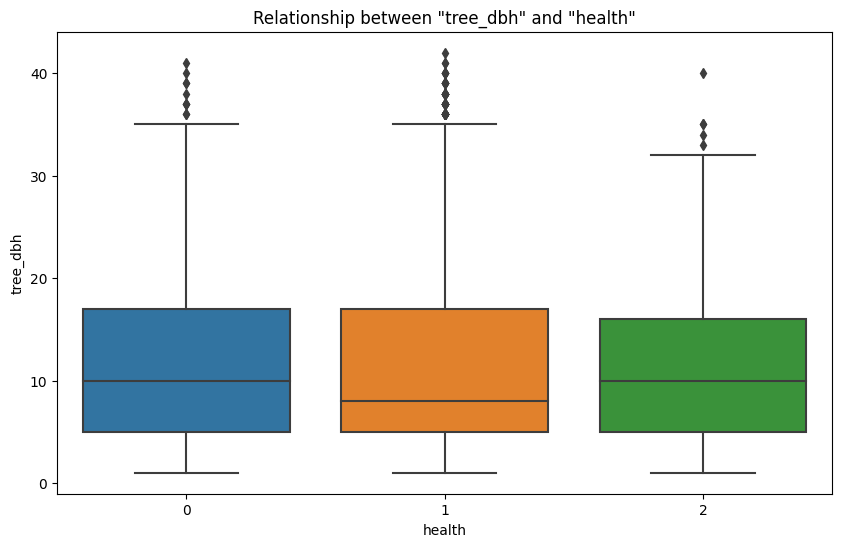

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='tree_dbh', data=train)
plt.title('Relationship between "tree_dbh" and "health"')
plt.show()

木の直径と目的変数の関係を示すボックスプロットを作成しました。\
このプロットから、健康状態によって多少木の直径が関係しているように見て取れます。

さらに、カテゴリ変数についても目的変数との関係を可視化してみましょう。

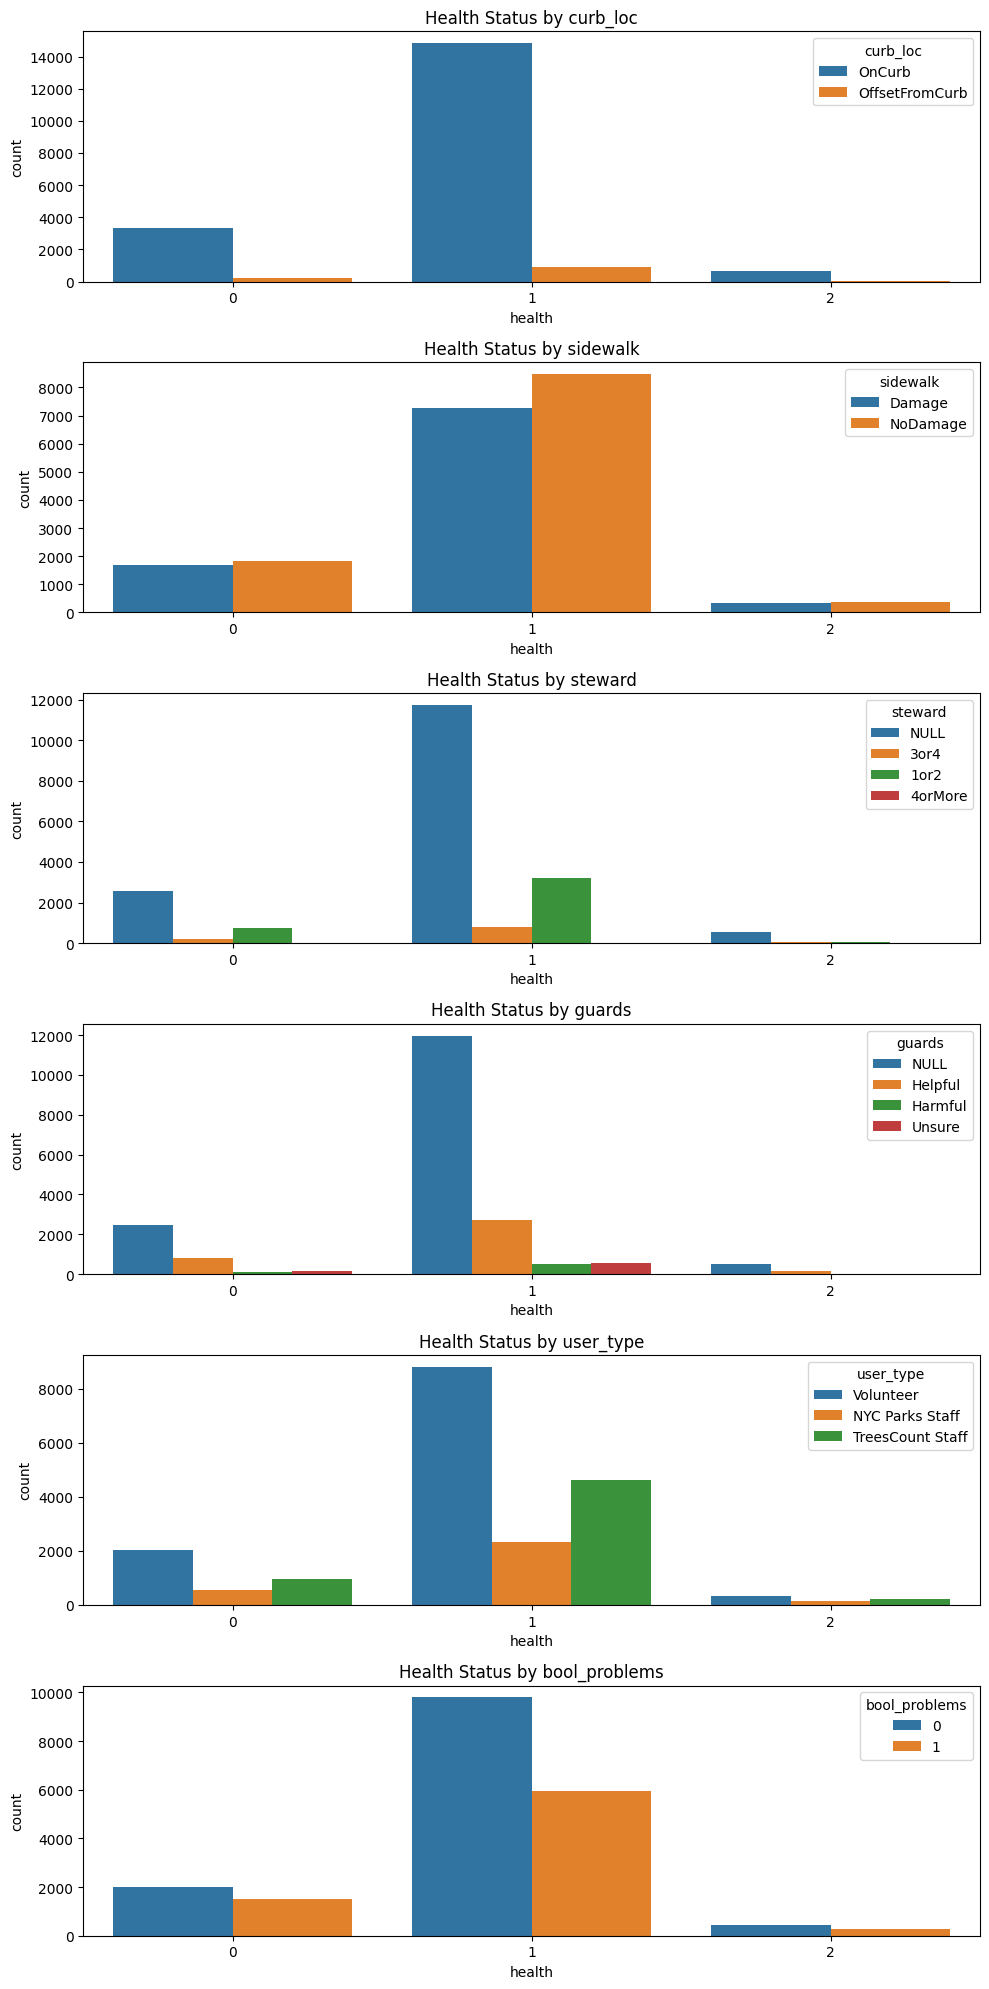

In [ ]:
categorical_features = ['curb_loc', 'sidewalk', 'steward', 'guards', 'user_type', 'bool_problems']

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 20))

for i, feature in enumerate(categorical_features):
    sns.countplot(x='health', hue=feature, data=train, ax=axes[i])
    axes[i].set_title(f'Health Status by {feature}')
    axes[i].legend(title=feature, loc='upper right')

plt.tight_layout()
plt.show()

# 8.モデリングをしてみよう
ここまでの分析で使用した特徴量を用いて、モデリングを行います。\
モデリングの準備としてtestデータにも同様の前処理を行なっておきましょう。

In [ ]:
test.fillna('NULL', inplace=True)
test['bool_problems'] = test['problems'].apply(lambda x: 0 if x=='NULL' else 1)

作成したモデルの精度が良いかどうかを事前に判断するために、学習用データ（train）から検証用データを作ります。

In [ ]:
train.shape

(19984, 22)

In [ ]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(train, test_size=0.2, stratify=train['health'], random_state=82) # stratifyを設定することで目的変数の分布を保ったまま分割することができます。

In [ ]:
train.shape

(15987, 22)

In [ ]:
valid.shape

(3997, 22)

In [ ]:
# 使用する特徴量の選択
select_cols = ['tree_dbh', 'curb_loc', 'sidewalk', 'steward', 'guards', 'user_type', 'bool_problems']

# 目的変数とそれ以外に学習用データを分割
x_train = train[select_cols]
y_train = train['health']
x_valid = valid[select_cols]
y_valid = valid['health']

# カテゴリのままでは学習できないのでワンホットエンコーディングで数値化
x_train = pd.get_dummies(x_train)
x_valid = pd.get_dummies(x_valid)
test =pd.get_dummies(test[select_cols])

これでモデリングの準備が整いました。\
今回はRandomForestを使ってモデリングを行なっていきます。\
このコンペティションの評価指標はmacro_f1scoreですので、それでスコアも計算してみます。

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

valid_predictions = model.predict(x_valid)
valid_f1 = f1_score(y_valid, valid_predictions, average='macro')
print(f"Validation F1 Score (Macro): {valid_f1}")

Validation F1 Score (Macro): 0.319831422200685


これでモデルが作成できました。

学習したモデルにtestデータを入力すると、testデータに対する木の健康状態を予測してくれます。

In [ ]:
pred = model.predict(test)
print(pred[:5])

[1 1 1 1 1]


# 9.予測結果を投稿しよう
応募用サンプルファイルで予測結果が格納されている1列目の値を、今回出力した予測結果に置き換えた上で、ヘッダ無しcsv形式のファイルとして保存しましょう。

In [ ]:
sample_submit[1] = pred
sample_submit.to_csv('/content/drive/MyDrive/SMFG/submit.csv', header=None)

これでGoogle Driveの中のSMFGフォルダ内に投稿用ファイルが作成されます。\
このデータをダウンロードして、コンペティションサイトの投稿ボタンからファイルの投稿を行ってみてください。

# 10.より良い精度を出すために
お疲れ様でした！無事予測結果をすることができました。\
今回は簡易的に前処理、特徴量選択、モデリングを行いました。\
ここからさらにより良い精度を出すためには下記のことを参考にしてみてください。
- 場所関連の情報を分析に取り入れる\
今回は場所関連の特徴量は使用しませんでしたが、工業地帯や木にとって育ちにくいような気候など、木の健康状態に影響を及ぼすかもしれません。
- 複雑モデリングを行う\
今回は比較的計算に時間がかからないRandomForestを使用しましたが、ディープラーニングやAutoMLなどを使用することで、より精度の高いモデルを作成することができるかもしれません。
